# Example of fitting regions in NGC6888

In this notebook, we go through fitting two regions of NGC 6888. This notebook exists for the sole purpose of demonstrating LUCI's prowess at fitting regions :)

This notebook thus assumes that you have already gone through the tutorials.

In [1]:
# Imports
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

# Get location of LUCI 
path = '/home/carterrhea/Documents/LUCI/'
sys.path.insert(0, path)  # add LUCI to the available paths

from LuciBase import Luci
import LUCI.LuciPlotting as lplt

%config Completer.use_jedi=False  # enable autocompletion when typing in Jupyter notebooks

Now we need to define all the variables...

In [2]:
# Initialize paths and set parameters
Luci_path = path
cube_dir = '/home/carterrhea/Documents/NGC6888'  # Full path to data cube 
cube_name = 'NGC6888_SN3'  # don't add .hdf5 extension
object_name = 'NGC6888'
redshift = 0.00  # Redshift of object
resolution = 5000 

Intialize our LUCI object

In [3]:
cube = Luci(Luci_path, cube_dir + '/' + cube_name, cube_dir, object_name, redshift, resolution)

Reading in data...


100%|█████████████████████████████████████████████| 9/9 [00:14<00:00,  1.61s/it]


2022-04-19 16:19:54.120193: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-19 16:19:54.129304: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Create a deep frame quickly

In [4]:
cube.create_deep_image()

Existing deep frame extracted from hdf5 file.


## Picking the regions
Now let's take a quick look at the deep image to decide the regions we will fit.

![NGC6888-deep.png](NGC6888-deep.png)

I've highlighted the background red in green and the two fit regions in magenta. Region 1 is near the right edge of the image and reigon 2 is at the center3.

### Let's take a look at the background

100%|█████████████████████████████████████| 2064/2064 [00:00<00:00, 5970.81it/s]


<AxesSubplot:xlabel='Wavelength [cm-1]', ylabel='Flux [ergs s$^{-1}$ cm$^{-2}$ $\\AA^{-1}$]'>

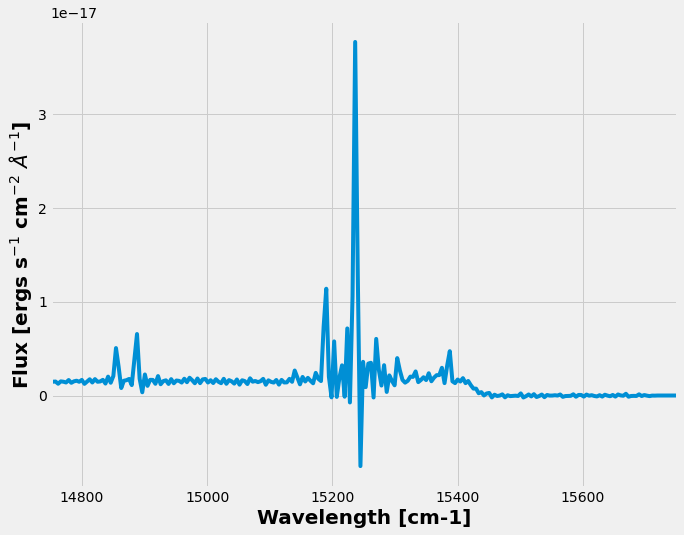

In [5]:
# We use 'mean = True' to take the mean of the emission in the region instead of the sum
bkg_axis, bkg_sky = cube.extract_spectrum_region(cube_dir+'/bkg.reg', mean=True)
lplt.plot_spectrum(bkg_axis, bkg_sky)

And now let's fit our regions and take a look at them

100%|█████████████████████████████████████| 2064/2064 [00:00<00:00, 6304.08it/s]


<AxesSubplot:xlabel='Wavelength [cm-1]', ylabel='Flux [ergs s$^{-1}$ cm$^{-2}$ $\\AA^{-1}$]'>

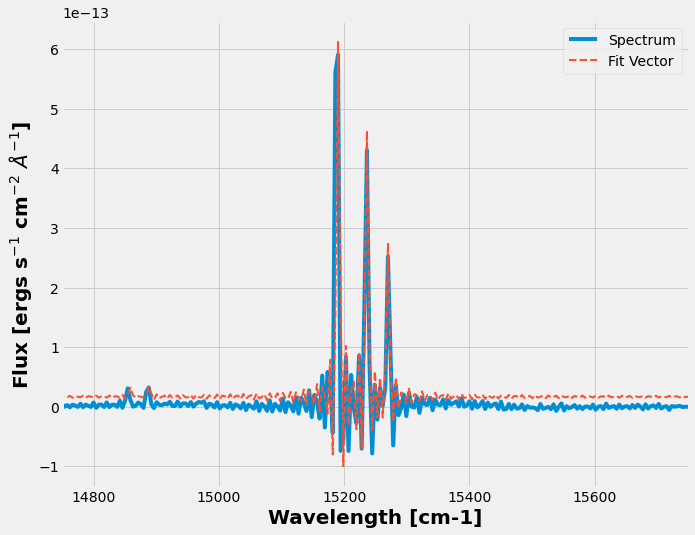

In [6]:
axis, sky, fit_dict = cube.fit_spectrum_region(
                                ['NII6548', 'Halpha', 'NII6583', 'SII6716', 'SII6731'],
                                'sincgauss',
                                [1,1,1,1,1], [1,1,1,1,1],
                                region=cube_dir+'/region1.reg', bkg=bkg_sky,
                                bayes_bool=False)
lplt.plot_fit(axis, sky, fit_dict['fit_vector'])

100%|█████████████████████████████████████| 2064/2064 [00:00<00:00, 6231.06it/s]


<AxesSubplot:xlabel='Wavelength [cm-1]', ylabel='Flux [ergs s$^{-1}$ cm$^{-2}$ $\\AA^{-1}$]'>

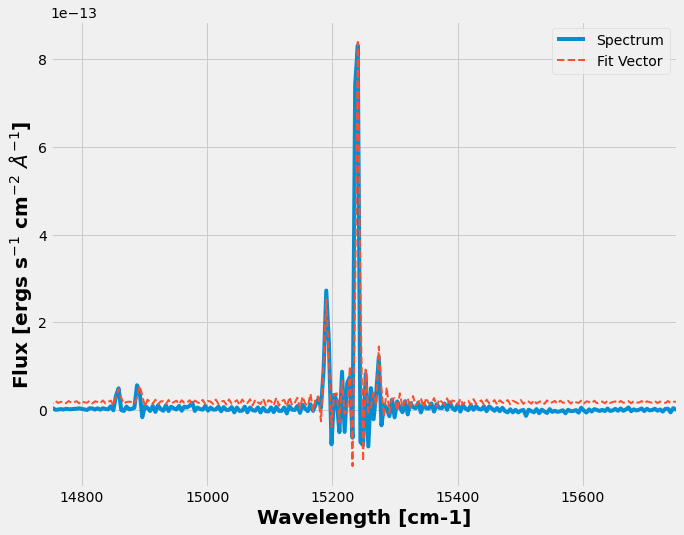

In [7]:
axis, sky, fit_dict = cube.fit_spectrum_region(
                                ['NII6548', 'Halpha', 'NII6583', 'SII6716', 'SII6731'],
                                'sincgauss',
                                [1,1,1,1,1], [1,1,1,1,1],
                                region=cube_dir+'/region2.reg', bkg=bkg_sky,
                                bayes_bool=False)
lplt.plot_fit(axis, sky, fit_dict['fit_vector'])

### Results

The fits are looking pretty great! 